In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%env BSD500_DATA_DIR=/home/zaccharie/workspace/understanding-unets/
%env BSD68_DATA_DIR=/home/zaccharie/workspace/understanding-unets/

env: BSD500_DATA_DIR=/home/zaccharie/workspace/understanding-unets/
env: BSD68_DATA_DIR=/home/zaccharie/workspace/understanding-unets/


In [3]:
%cd ..
from tdv import TDV
%cd experiments
from data import im_dataset_bsd500
from unrolled_fb import UnrolledFB

/home/zaccharie/workspace/tf-tdv
/home/zaccharie/workspace/tf-tdv/experiments


In [12]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np

In [4]:
train_ds = im_dataset_bsd500(batch_size=4)

In [5]:
model = UnrolledFB(TDV, {})

In [6]:
model.compile(loss='mse', optimizer='adam')

In [7]:
%%time
data = next(iter(train_ds))

CPU times: user 220 ms, sys: 2.39 ms, total: 222 ms
Wall time: 120 ms


In [14]:
model(data[0])

<tf.Tensor: shape=(32, 96, 96, 1), dtype=float32, numpy=
array([[[[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        ...,

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]]],


       [[[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],

In [8]:
## overfitting
model.fit(x=data[0], y=data[1], epochs=1, batch_size=1)

32/32 [==============================] - 100s 3s/step - loss: nan


<IPython.core.display.Javascript object>


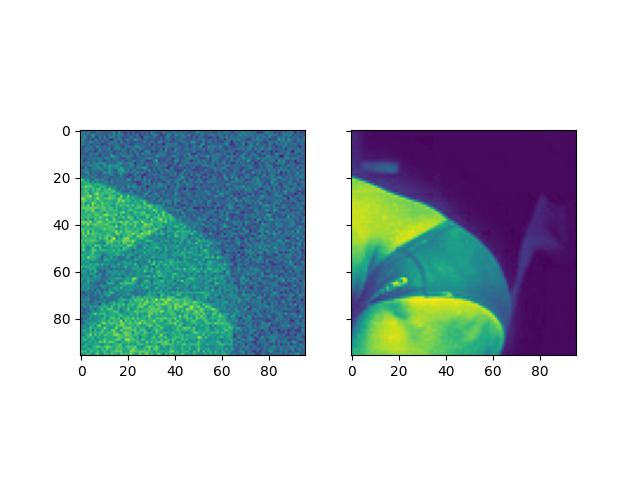

In [13]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)
axs[0].imshow(np.squeeze(data[0][0]))
axs[1].imshow(np.squeeze(data[1][0]))

In [9]:
# model.fit(train_ds, epochs=int(1e3//400), steps_per_epoch=400)